# Tarea 2

#### Instrucciones:
- La tarea consta de una parte de preguntas y otra de desarrollo de código. Debe entregar todas las respuestas en formato notebook, y cuando la respuesta sea texto, debe hacer en celdas markdown con formato.
- La entrega de la Tarea es el día **17 de Octubre, 23:59 hrs.**


## Nombre(s):
- Krishna Campillay Alumna
- Francisca Stefania Gutiérrez Alumna


## Bosón de Higgs

En esta tarea trabajaremos con datos simulados del bosón de Higgs (versión simplificada), del desafío de [Kaggle](https://www.kaggle.com/c/higgs-boson/overview). Los archivos son Higgs_features.csv y Higgs_labels.csv. Las etiquetas son 0 (no hay señal de Higgs) y 1 (señal de Higgs). Las features son similares a los vistos en el set que utilizamos en clases, tales como energía faltantes, energía, momentum, rapidez transversal y azimutal, etc. Puede encontrar más detalles [acá](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). Note que el set de datos para esta tarea es una versión simplificada.

### Parte 1: Descripción de los datos

Cargue los datos dataframes o arreglos de `numpy`, uno para features y otro para etiquetas

- Identifique cúantes instancias y características hay en el set de datos
- Haga un gráfico de la distribución (histograma) de cada feature en el set de datos, en un sólo gráfico. Agregue una leyenda con las etiquetas (Feature 1, Feature 2....etc.) y fije la transparencia de los histogramas (parámetro alpha) en 0.5 para que se noten mejor. ¿Observa algo inusual en la distribución de alguna de las features? Comente en el impacto de esto para su modelo
- ¿Está balanceadas las etiquetas del set del datos? ¿ Por qué esto es un problema? ¿Qué métrica nos conviene usar?




### Parte 2: Árbol de decisión

- Implemente un clasificador de árbol de decisión con validación cruzada, para una métrica de su elección en base a lo respondido en la pregunta anterior. Reporte el promedio y desviación estándar de los scores obtenidos en los 5 folds.
- Para esta muestra en particular se recomienda usar `StratifiedKFold`. ¿Por qué?
- Genere las etiquetas predichas con `cross_val_predict` y genere la matriz de confusión
- A partir de la matriz de confusión indique los valores de TP, TN, FP, FN. ¿Qué error domina, FP o FN?

### Parte 3: SVMs

- Ahora usemos un clasificador usando SVM. Usando SVC, deje los parámetros del clasificador los que viene por defecto y haga una validación cruzada con k=5 y reporte los scores, como hizo antes con el árbol de decisión. ¿Qué algoritmo tiene mejor performance?
Nota: SVMs es un algoritmo lento y puede tomar tiempo este cálculo. Si toma demasiado tiempo, reduzca el número de folds (no menos de 3).
- Reporte la matriz de confusión para SVC. Hay algún cambio de los valores de FP y FN respecto al modelo de árbol de decisión?

### Parte 4: optimización de hiperparámetros

- Intente optimizar los parámetros de SVC. Para evitar que tome demasiado tiempo, seleccione solo el primer 5% de los datos (asegúrese de desordenarlos antes)
- Haga un esquema de CV con GridSearch, con los siguientes valores de parámetros:
parameters = {'kernel':['linear','rbf'],'C':[1, 10, 100], 'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}
- Recuerde seguir usando la métrica que eligió más arriba.
- Esto tomará tiempo! Fije verbose=2 en GridSearch para monitorear el progreso, y njobs=4 o más para acelerar un poco el proceso.
- Reporte los parámetros y scores del mejor modelo



### Parte 5: clases imbalanceadas
- Existen muchas estrategias para manejar clases imbalanceadas... (De hecho, en el paso anterior aplicamos una, puede decir cuál es?). Investigue o piense una solución para el desbalance, impleméntela para SVC con los parámetros optimizados, y comente su resultado, compare con el anterior

### Parte 6: Conclusiones

- En base a sus resultados, cuál algoritmo de clasificación recomendaría para este problema?
- ¿Qué otras consideraciones o limitaciones tenemos?

# **Desarrollo**

# Parte 1: Descripción de los datos

En este proyecto se busca clasificar eventos asociados al Bosón de Higgs a partir de un conjunto de datos con variables físicas simuladas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

Leemos las caracteristicas

In [ ]:
features = pd.read_csv('Higgs_features.csv')

In [ ]:
features

,393.3350,79.4600,308.8790,4.0950,1.4030,-1.4110,49.0630,39.4780
0,71.048,29.291,55.602,2.439,1.667,-1.412,22.926,9.486
1,141.450,87.017,72.091,1.472,4.714,1.233,23.591,69.754
2,156.539,39.797,127.933,4.017,1.279,-1.408,21.415,18.222
3,89.639,34.399,66.741,2.934,1.417,-1.377,26.459,8.257
4,103.203,7.979,56.074,1.420,0.476,1.216,57.804,60.140
...,...,...,...,...,...,...,...,...
24994,109.449,58.608,65.599,2.573,1.103,1.201,31.336,29.377
24995,139.483,32.872,96.408,2.439,0.447,1.325,69.421,14.668
24996,78.421,51.766,51.303,2.054,1.225,1.108,26.775,30.509
24997,90.507,70.860,75.535,1.650,1.122,-1.410,45.511,27.279


A continuacion que representa cada columnas de la tabla(features):

* Las primeras 3 columnas son masas derivadas (energía combinada de las partículas).

* Las columnas 4–6 son relaciones o ángulos entre partículas detectadas.

* Las últimas 2 columnas son medidas directas de momento (energía transversa) de las partículas principales: el tau y el leptón.

Leemos las etiquetas

In [ ]:
labels = pd.read_csv('Higgs_labels.csv')

In [ ]:
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
24994,0
24995,1
24996,0
24997,0


Acá se visualiza a que corresponde las instancias y las caracteristicas del archivo y la cantidad que tienen respectivamente

In [ ]:
instancias, caracteristicas = features.shape
print(f"Número de instancias (filas): {instancias}")
print(f"Número de características (columnas): {caracteristicas}")

Número de instancias (filas): 24999
Número de características (columnas): 8


In [ ]:
instancias, caracteristicas = labels.shape
print(f"Número de instancias (filas): {instancias}")
print(f"Número de características (columnas): {caracteristicas}")


Número de instancias (filas): 24999
Número de características (columnas): 1


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   393.3350  24999 non-null  float64
 1   79.4600   24999 non-null  float64
 2   308.8790  24999 non-null  float64
 3   4.0950    24999 non-null  float64
 4   1.4030    24999 non-null  float64
 5   -1.4110   24999 non-null  float64
 6   49.0630   24999 non-null  float64
 7   39.4780   24999 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB


In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       24999 non-null  int64
dtypes: int64(1)
memory usage: 195.4 KB


Utilizamos .describe() para ver la posible existencia de outliers mediante la comprobacion de la mean y la std

In [ ]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
393.3350,24999.0,-48.104323,404.974770,-999.000,78.319,104.798,130.0415,835.250
79.4600,24999.0,49.136848,35.100638,0.005,19.260,46.790,73.2725,595.819
308.8790,24999.0,80.952278,39.827180,9.495,59.251,73.521,92.0510,640.039
4.0950,24999.0,2.371172,0.781176,0.313,1.801,2.490,2.9610,5.655
1.4030,24999.0,1.438943,0.846023,0.077,0.878,1.279,1.7760,13.137
-1.4110,24999.0,-0.120622,1.191621,-1.414,-1.368,-0.311,1.2290,1.414
49.0630,24999.0,38.688419,22.446422,20.000,24.583,31.775,44.9540,381.629
39.4780,24999.0,41.807771,32.431999,0.346,21.447,34.839,51.7565,551.060


No se realizó eliminación de outliers, ya que los valores extremos corresponden a eventos reales de alta energía y no a errores de medición.

Hacemos la visulizaciones de los nombres de las columnas de nuestros features para poder acceder a ellas

In [ ]:
print(features.columns)

Index(['393.3350', '79.4600', '308.8790', '4.0950', '1.4030', '-1.4110',
       '49.0630', '39.4780'],
      dtype='object')


Visualizacion del histrograma con todas las features

El valor -999 representa los datos faltantes o invalidos, por ello para realizar el gráfico los reemplazamos por NaN.

In [ ]:
featuresplot= features.replace(-999, np.nan)
featuresplot= featuresplot.fillna(featuresplot.median())


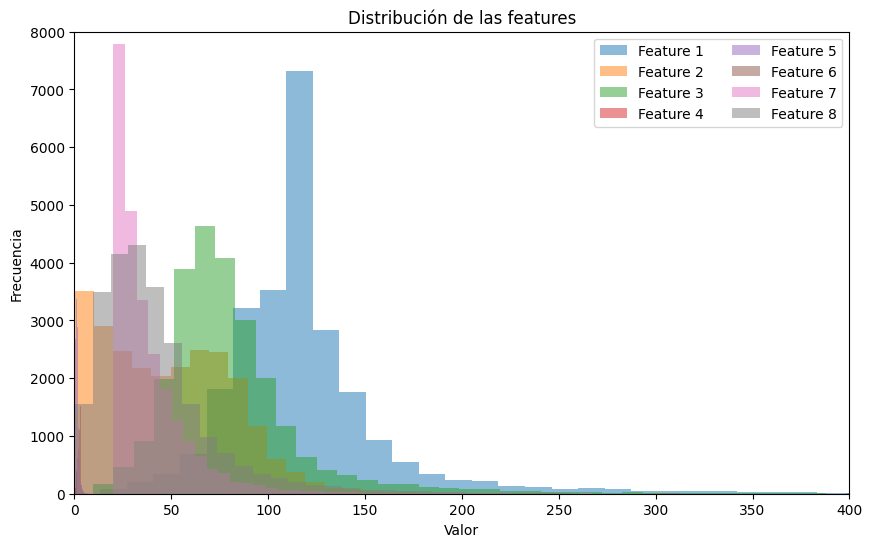

In [ ]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(featuresplot.columns, start=1):
    valores = featuresplot[feature].dropna().to_numpy()
    plt.hist(valores, bins=60, alpha=0.5, label=f'Feature {i}')

plt.title("Distribución de las features")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend(fontsize=10, ncol=2)
plt.xlim(0, 400)
plt.ylim(0, 8000)
plt.show()

A partir del gráfico, podemos notar que las distribuciones se encuentran en distintos rangos y son sesgadas, es decir, que los datos no se distribuyen de forma simetrica alrededor del promedio. Mayormente notamos sesgos positivos. Y vemos una mayor frecuencia en el Feature 7 y 1, siendo este útimo el que tiene mayores valores. Lo bueno es que todas las distribuciones siguen un patrón que es lógico paara variales físicas continuas, donde no se observa ningún valor fuera del rango físico.
El sesgo positivo puede afectar la media y la desviación estandar, y junto con las diferentes escalas también afectan a la distancia entre puntos, utilizada en modelos como SVM o KNN. Para solucionarlo se debe aplicar un escalado.

In [ ]:
features.duplicated().sum()

np.int64(0)

Se obtiene que no hay valores duplicados

In [ ]:
print("Conteos por clase:")
print(labels.value_counts().sort_index())

Conteos por clase:
0
0    16525
1     8474
Name: count, dtype: int64


Notamos que la mayor parte de los labels corresponde al valor 0, posee el doble que el valor 1. Esto significa que las etiquetas estan desbalanceadas, hay muchos más eventos sin señal del Bosón de Higgs (clase 0) que con señal (clase 1), esto afecta porque el modelo va a tender a predecir siempre la parte mayoritaria, sin detectar bien la otra señal. Para solucionar esto se aplica una métrica, en este caso nos conviene usar F1 score, que combina presición y Recall, porque hay un desbalance de clases.

# Parte 2: Árbol de decisión

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn import metrics
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.25, random_state=2, stratify=labels)



Entrenamiento y prueba

In [ ]:
Xtrain.shape, Xtest.shape

((18749, 8), (6250, 8))

In [ ]:
ytrain.shape, ytest.shape

((18749, 1), (6250, 1))

creamos el pipeline (una secuencias de datos que se ejecutan cada vez que entrenas)

y dividimos el conjunto de datos

In [ ]:
#Arbol de desición
model = make_pipeline(SimpleImputer(missing_values=-999, strategy='median'), DecisionTreeClassifier(random_state=2))

#Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)


Hacemos una validacion cruzada y evaluamos el modelo

In [ ]:
y = labels.values.ravel()
score = cross_validate(model, features, y, cv=cv, scoring='f1', return_train_score=True)


Entrenamiento final del modelo

In [ ]:
model.fit(Xtrain, ytrain)

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(missing_values=-999, strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=2))])

Calculo del promedio y Desviacion estandar del F1-score

In [ ]:
prom = np.round(score['test_score'].mean(), 3)
desv = np.round(score['test_score'].std(), 3)
print("Promedio:", prom, "Desviación estándar:", desv)

Promedio: 0.64 Desviación estándar: 0.003


In [ ]:
y_pred = cross_val_predict(model, features, y, cv=cv)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cm = metrics.confusion_matrix(y, y_pred)

Confusion matrix, without normalization
[[13470  3055]
 [ 3052  5422]]


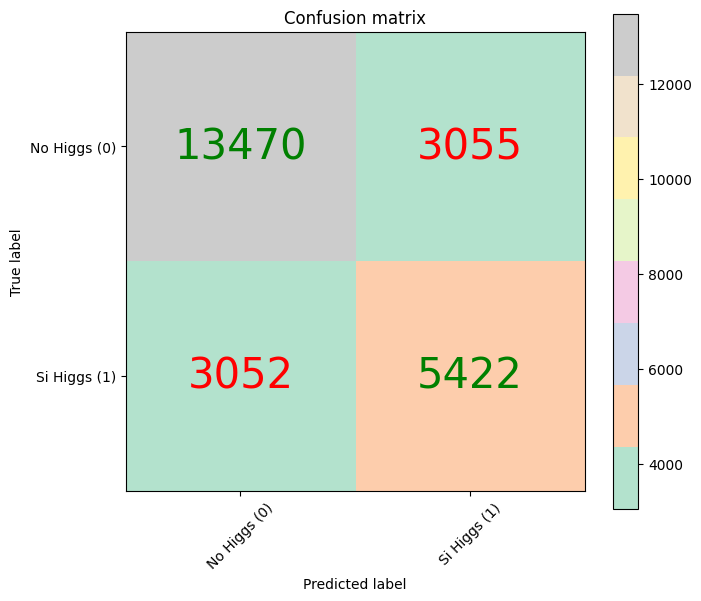

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Pastel2):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(7,6))
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center", verticalalignment="center",
                     color="green" if i == j else "red", fontsize=30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, classes=['No Higgs (0)', 'Si Higgs (1)'])

In [ ]:
TN, FP, FN, TP = cm.ravel()
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
#Para saber que error domina
print("Domina FP" if FP > FN else "Domina FN")

TP: 5422, TN: 13470, FP: 3055, FN: 3052
Domina FP


Como podemos ver, dominan los falsos positivos, esto quiere decir que el modelo predice Higgs, cuando no hay. Ocurre por el desbalance de clases que existe, ya que hay mucha más clase 0, eso hace que el modelo aprenda mal los patrones de la clase 1

# Parte 3: SVMs

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

svm = make_pipeline(SimpleImputer(missing_values=-999, strategy='median'), StandardScaler(), SVC()  )
y = labels.values.ravel()

In [ ]:
score_svm = cross_validate(svm,features, y , cv=cv, scoring='f1', return_train_score=True)
prom_svm = np.round(score_svm['test_score'].mean(), 3)
desv_svm  = np.round(score_svm['test_score'].std(), 3)
print("El promedio utilizando SVM con F1 es:", prom_svm, "Y la desviación estándar es:", desv_svm)

El promedio utilizando SVM con F1 es: 0.72 Y la desviación estándar es: 0.009


Con CV k=5, SVM (F1 = 0.72 ± 0.009) supera al Árbol (F1 = 0.64 ± 0.003), por lo que SVM muestra mejor performance bajo F1.

In [ ]:
ypred_svm = cross_val_predict(svm, features, y, cv=cv)
cm_svm = metrics.confusion_matrix(y, ypred_svm)

Confusion matrix, without normalization
[[14733  1792]
 [ 2698  5776]]
TP:5776, TN:14733, FP:1792, FN:2698
Domina FN


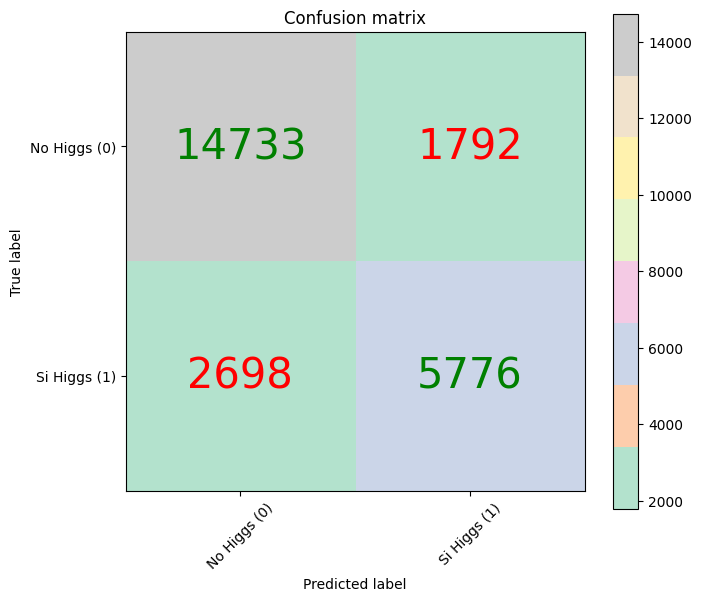

In [ ]:
plot_confusion_matrix(cm_svm, classes=['No Higgs (0)', 'Si Higgs (1)'])
TN, FP, FN, TP = cm_svm.ravel()
print(f"TP:{TP}, TN:{TN}, FP:{FP}, FN:{FN}")
print("Domina FP" if FP > FN else "Domina FN")

Notamos que con este modelo dominan los falsos negativos, mientras que con el árbol de desición dominaban los falsos positivos. Este cambio se puede deber a que el árbol tiene un mayor recall pero menor presición, y SVM es más conservador con mayor presición y menor recall, perdiendo más señales verdaderas.


# Parte 4: optimización de hiperparámetros

Para optimizar lo parametros, tenemos que elegir los que dan mejores scores de prueba.

In [ ]:
feature_0 = features.replace(-999, np.nan).fillna(0)

In [ ]:
X_resto, X_subset, y_resto, y_subset = train_test_split(feature_0, y, test_size=0.05, random_state=2, stratify=y)


In [ ]:
pipe_model = make_pipeline(StandardScaler(), SVC())

In [ ]:
parametros = {'svc__kernel': ['linear','rbf'], 'svc__C': [1, 10, 100], 'svc__gamma': [0.01, 0.1, 0.5],'svc__class_weight': [{1:1}, {1:3}, {1:5}]}

In [ ]:
model_grid = GridSearchCV(pipe_model, parametros, scoring='f1', cv=cv, verbose=2, n_jobs=4, return_train_score=True)
model_grid.fit(X_subset, y_subset)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=4,
             param_grid={'svc__C': [1, 10, 100],
                         'svc__class_weight': [{1: 1}, {1: 3}, {1: 5}],
                         'svc__gamma': [0.01, 0.1, 0.5],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='f1', verbose=2)

In [ ]:
print('Best params, best score:', "{:.4f}".format(model_grid.best_score_), model_grid.best_params_)


Best params, best score: 0.7135 {'svc__C': 10, 'svc__class_weight': {1: 3}, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


# Parte 5: Clases imbalanceadas

* 'svc__class_weight': [{1:1}, {1:3}, {1:5}

Para trabajar las clases imbalanceadas se trabajo anteriormente usando el pesos de las clases (class_weight), de esa forma el modelo penaliza  más los errores cometidos sobre la clase minoritaria




Ahora vamos a probar con SMOTE debido a que es perfecto con clases imbalanceadas
* Por qué es útil?

En machine learning, los modelos a menudo tienen problemas para aprender patrones de clases minoritarias porque hay pocos datos disponibles. Esto puede resultar en un rendimiento pobre, como un sesgo hacia la clase mayoritaria. SMOTE ayuda a resolver esto al generar ejemplos sintéticos (artificiales) para la clase minoritaria, en lugar de simplemente duplicar los existentes, lo que podría causar sobreajuste

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score

Se realiza el balanceo de los datos con SMOTE

In [ ]:
smote = SMOTE(random_state=2)
X_bal, y_bal = smote.fit_resample(X_subset, y_subset)

Utilzamos los mejores parametros encontrados anteriormente en la **Parte 4**

In [ ]:
best_params = model_grid.best_params_
svc = SVC(
    kernel=best_params['svc__kernel'],
    C=best_params['svc__C'],
    gamma=best_params['svc__gamma'],
    class_weight=best_params['svc__class_weight']
)

Escalar los datos y entrenar el modelo con los datos balanceados

In [ ]:
pipe = make_pipeline(StandardScaler(), svc)
pipe.fit(X_bal, y_bal)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, class_weight={1: 3}, gamma=0.1))])

In [ ]:
y_pred = pipe.predict(X_resto)
print(classification_report(y_resto, y_pred))
print("F1 score:", f1_score(y_resto, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.62      0.74     15699
           1       0.55      0.90      0.68      8050

    accuracy                           0.71     23749
   macro avg       0.74      0.76      0.71     23749
weighted avg       0.80      0.71      0.72     23749

F1 score: 0.681501693639443


Este modelo debería mejorar en el recall y F1-score de la clase minoritaria.

Posiblemente una pequeña baja en la precisión total (accuracy), pero un modelo más justo y equilibrado.

Comparacion de los dos modelos

In [ ]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

y_pred_original = model_grid.best_estimator_.predict(X_resto)
print(" Modelo original (class_weight):")
print(classification_report(y_resto, y_pred_original))
print("F1 score:", f1_score(y_resto, y_pred_original))
print("Matriz de confusión:\n", confusion_matrix(y_resto, y_pred_original))


 Modelo original (class_weight):
              precision    recall  f1-score   support

           0       0.91      0.69      0.78     15699
           1       0.59      0.87      0.70      8050

    accuracy                           0.75     23749
   macro avg       0.75      0.78      0.74     23749
weighted avg       0.80      0.75      0.75     23749

F1 score: 0.698951171776986
Matriz de confusión:
 [[10786  4913]
 [ 1086  6964]]


In [ ]:
y_pred_smote = pipe.predict(X_resto)
print(" Modelo con SMOTE:")
print(classification_report(y_resto, y_pred_smote))
print("F1 score:", f1_score(y_resto, y_pred_smote))
print("Matriz de confusión:\n", confusion_matrix(y_resto, y_pred_smote))


 Modelo con SMOTE:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74     15699
           1       0.55      0.90      0.68      8050

    accuracy                           0.71     23749
   macro avg       0.74      0.76      0.71     23749
weighted avg       0.80      0.71      0.72     23749

F1 score: 0.681501693639443
Matriz de confusión:
 [[9736 5963]
 [ 807 7243]]


# Parte 6: Conclusiones

Ambos modelos funcionan razonablemente bien, pero el enfoque con class_weight ofrece un mejor equilibrio general entre precisión y recall (F1 global más alto).

El modelo con SMOTE mejora el recall de la clase minoritaria (detecta más positivos reales), a costa de una ligera pérdida en precisión y F1.

Según los resultados, SVC con class_weight ya mostró un buen equilibrio entre las clases
* F1=0.70
* recall=0.87

en cambio, SMOTE ayudó un poco en recall, pero bajó la precisión

Pero para trabajar mejor con datos binarios (0 y 1) y obtener mejores resultados *SVC* con class_weight es un buen candidato


*Consideraciones a tener en cuenta de SVC*

* SVC no escala bien con datasets grandes, se podrías probar árboles o boosting (por ejemplo XGBoost).

* La comparación debe basarse en métricas adecuadas al desbalance (como F1 o recall), no solo accuracy.

* Conviene validar también con cross-validation y no solo con una división de datos.



Durante el proceso, se empleó el 95% de los datos para el entrenamiento y la validacion cruzada, dejando solo un 5% para la optimización

Esto se hace porque:

* Se busca que el modelo aprenda con la mayor cantidad posible de información
* El 5% restante se usa para ajustar o comparar hiperparametros sin aumentar el costo computacional, especialmente en SVM que es un algorimo computacionalmente costoso
* Además, reduce el riesgo de sobreajuste al permitir una validacion más realista

* Arboles de decisión, F1-score = 0,64

Modelo rapido pero menos preciso, tiende a sobreajustar.

* SVM sin optimizar, F1-score = 0,72

Mejora la separacion de las clases aunque tarda más

* SVM optimizado,  F1-score = 0,70

Detecta más verdaderos positivos con leve baja de presion

Las diferencias se deben:

El SVM tiene una frontera de decision mas suave y general, lo que mejora la capacidad de generar frente a nuevos datos

El balanceo de clases hace que los modelos priorice correctamente los postivos reales.

**Matriz de confusión**

En el arbol de desición, el error dominante son los falsos negativos (donde hay señal de higgs pero el modelo no la detecta)

En el SVM optimizado, se reduce significativamente el numero de Falsos negatios, aunque se incrementan un poco los falsos positivos



# Bibliografía

* Manual de usuario de Scikit-learn  https://scikit-learn.org/stable/user_guide.html

Archivos de clase utilizados:
* Código semana 3 - KNN
* Código semana 4 - Métricas
* Código semana 5 - SVMs
* PPT semana 4 - Métricas



### Uso de IA Generativa

Para obtener un mejor resultado y que este dentro de nuestro contexto se consulto a una IA


prompt: Investigue o piense una solución para el desbalance, impleméntela para SVC

respuesta:
* Aumentar muestras de la clase minoritaria (oversampling)

Duplica o sintetiza ejemplos de la clase minoritaria. Ej: **SMOTE**

* Reducir muestras de la clase mayoritaria (undersampling)

Elimina ejemplos de la clase mayoritaria

* Combinadas

Usar SMOTE + TomekLinks, etc.

* Ajustar umbral de decisión

Cambiar el punto de corte para clasificar 1 o 0

* Cambiar métrica de evaluación

Usar F1, recall o AUC en vez de accuracy

prompt: me puedes decir que significa cada columna del archivo features = pd.read_csv('Higgs_features.csv')

respuesta..

Las primeras 3 columnas son masas derivadas (energía combinada de las partículas).

Las columnas 4–6 son relaciones o ángulos entre partículas detectadas.

Las últimas 2 columnas son medidas directas de momento (energía transversa) de las partículas principales: el tau y el leptón.